<a href="https://colab.research.google.com/github/PabloAguirreSolana/Bayesian-Inference-to-predict-the-probabilities-/blob/main/Bayesian_Inference_to_predict_the_probabilities_of_a_Primary_Party_Election_based_on_Opinion_Polls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bayesian Inference to predict the probabilities of a Primary Party Election based on Opinion Polls**

 The objective of this notebook is to provide a simple code to calculate the posteriors of A and B and see who is more likely to have the biggest probability. (Assuming that A and B are two final candidates that are contesting a Primary Election)

 The procedure is very simple:

 - Transform percenateges of opinion polls of candidate A and B as trials so that they can serve as priors.
 - Create a function to simulate the beta posteriors (with this function we can add new information as priors and add it to the model, based on previous knowledge or domain expertise)
 - Plot the posterior distributions
 - Calculate the posterior difference between A and B
 - Calcualte a 90% and 95% credible inetrval, which will tell us the estimation error in terms of proababilities.






In [1]:
# Import all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az
import random

In [2]:
# Transform the percentages of opinion polls to trials (Ap = Percentage of Candidate A in poll, Bp = Percentage of Canidadte B in poll)
# You can change the numbers here based on the poll results

Ap = .59
Bp = .41

In [3]:
# Set the number of trials for simulation
trials = 10000
#Transform percetanges to trials
cases_A_list = int(Ap*trials)
cases_B_list = int(Bp*trials)

In [4]:
#Create a list for trials in A and trials in B
A_list = [1] * cases_A_list + [0] * (trials - cases_A_list)
B_list = [1] * cases_B_list + [0] * (trials - cases_B_list)

In [5]:
# Shuffle the lists to randomize the distribution of 1s and 0s
random.shuffle(A_list)
random.shuffle(B_list)
# Verify the sums of the lists
print(sum(A_list))
print(sum(B_list))

5900
4100


In [6]:
#Create a function to simulate the beta posteriors
def simulate_beta_posteriors(trials, beta_prior_a, beta_prior_b):
    num_sucesses = np.sum(trials)
    posterior_draws = np.random.beta(
        num_sucesses + beta_prior_a,
        len(trials) - num_sucesses + beta_prior_b,
        10000)
    return posterior_draws

In [7]:
# Simulate posterior draws for each label, base on new evidence Beta(a,b)
A_posterior = simulate_beta_posteriors(A_list, 60, 40)
B_posterior = simulate_beta_posteriors(B_list, 60, 40)

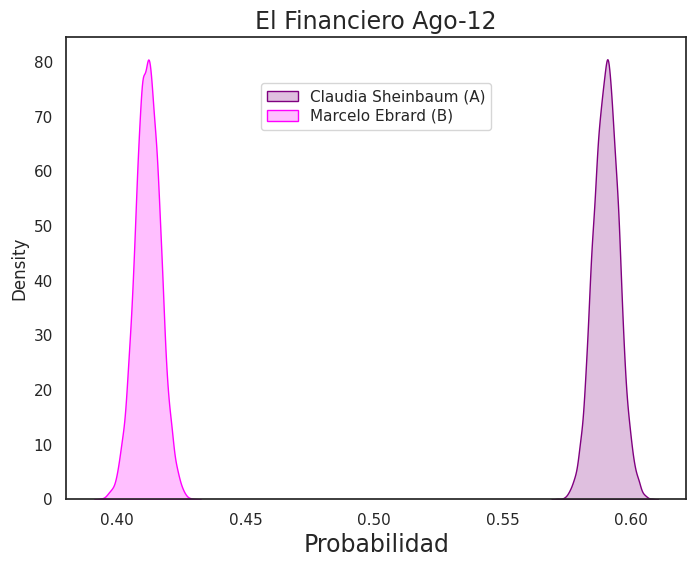

In [11]:
#Plot the posterior distributions
# Change the title if necessary for different polls or candidates
sns.set(style="white")
plt.figure(figsize=(8, 6))
sns.kdeplot(A_posterior, fill=True, color = 'purple', label="Claudia Sheinbaum (A)")
sns.kdeplot(B_posterior, fill=True, color= 'magenta', label="Marcelo Ebrard (B)")
# Get current axes
ax = plt.gca()
# Center the labels
ax.set_title("El Financiero Ago-12", fontsize=17)
ax.set_xlabel("Probabilidad",fontsize=17 )
ax.set_ylabel("Density")
ax.legend( loc='center', bbox_to_anchor=(0.50, 0.85), labelspacing=0.3)
plt.show()

In [9]:
#Calculate the posterior diference between A and B, this will tell us how much better is A to B
diff = A_posterior - B_posterior
A_posterior_prob = (diff > 0).mean()
print(A_posterior_prob)

1.0


In [10]:
#High posterior density (HDP)
ci_90 = az.hdi(diff, hdi_prob=0.9)
ci_95 = az.hdi(diff, hdi_prob=0.95)
#Print and round the arrays
print(np.round(ci_90, 2))
print(np.round(ci_95, 2))

[0.17 0.19]
[0.17 0.19]
